## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score , accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import sklearn

## Importing Data

In [2]:
df = pd.read_csv("D:/AI ML/Internship/creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

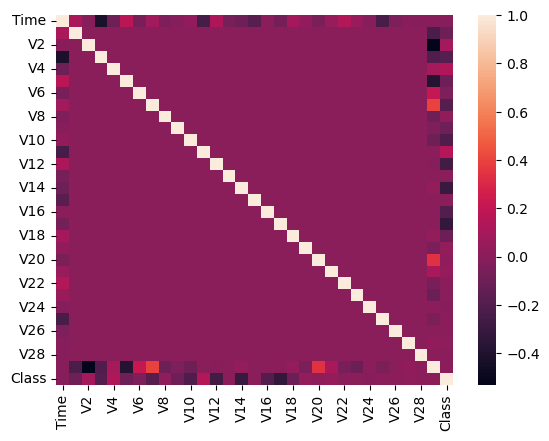

In [4]:
# Determining if there is any correlation in data 
sns.heatmap(df.corr())

## Data Preprocessing

In [5]:
# Scaling the data between 0 and 1
scaling = MinMaxScaler()
df1 = pd.DataFrame(scaling.fit_transform(df) , columns = df.columns)

In [6]:
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0.0
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0.0
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0.0
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0.0


In [7]:
#splitting the dataset with fraud and genuine transactions
dfminority = df1[df1["Class"] == 1]
dfmajority = df1[df1["Class"] == 0]

In [8]:
dfminority

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,0.002350,0.919012,0.787855,0.809517,0.429154,0.762201,0.248677,0.249897,0.800314,0.367355,...,0.569817,0.508396,0.658525,0.425381,0.580406,0.454498,0.421331,0.310216,0.000000,1.0
623,0.002732,0.906588,0.733944,0.856275,0.353384,0.774870,0.252314,0.267339,0.784658,0.453446,...,0.572146,0.530346,0.685868,0.342644,0.593612,0.401704,0.411845,0.313850,0.020591,1.0
4920,0.025823,0.919163,0.785821,0.831180,0.355228,0.760185,0.262258,0.268781,0.781104,0.454573,...,0.556737,0.466535,0.667999,0.370467,0.569143,0.336811,0.417241,0.310018,0.009339,1.0
6108,0.040430,0.883578,0.781591,0.792483,0.370723,0.758122,0.245862,0.244056,0.782717,0.454245,...,0.570726,0.518287,0.658956,0.375025,0.592075,0.318049,0.401244,0.330364,0.002297,1.0
6329,0.043515,0.979262,0.799121,0.762821,0.461731,0.790114,0.249369,0.275794,0.780061,0.418588,...,0.555369,0.477181,0.655679,0.162235,0.661482,0.518034,0.416326,0.316103,0.000039,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,0.978876,0.925541,0.779136,0.759117,0.329475,0.755171,0.242806,0.259977,0.792864,0.391646,...,0.574031,0.495141,0.674930,0.342499,0.608078,0.554231,0.421913,0.316127,0.015180,1.0
280143,0.980063,0.981714,0.780863,0.750697,0.314516,0.768696,0.249683,0.256746,0.788051,0.423943,...,0.567454,0.511348,0.663271,0.371313,0.607201,0.546239,0.423694,0.316911,0.000030,1.0
280149,0.980086,0.946807,0.779143,0.799053,0.272690,0.758173,0.262986,0.251741,0.798367,0.440311,...,0.573599,0.548942,0.668269,0.386556,0.536386,0.502403,0.423619,0.317068,0.003032,1.0
281144,0.983645,0.905394,0.773440,0.743844,0.332480,0.760057,0.233425,0.251904,0.796742,0.406549,...,0.570882,0.497472,0.658660,0.357486,0.559486,0.524456,0.432844,0.307976,0.009536,1.0


In [9]:
# Resamping and adding 250000 new samples in minority set to balance the dataset 
dfminority = resample(dfminority,n_samples = 250000)
# Combining the two datasets to create a new balances dataset with appriximately same positive and negative samples
dfnew = dfmajority.append(dfminority)

C:\Users\Kartik\AppData\Local\Temp\ipykernel_15404\2570647185.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfnew = dfmajority.append(dfminority)


In [10]:
dfnew

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150925,0.544823,0.728740,0.853941,0.550061,0.527098,0.689521,0.232886,0.157888,0.785818,0.269173,...,0.546844,0.580660,0.663327,0.488577,0.576147,0.383785,0.382072,0.304150,0.001770,1.0
43773,0.241018,0.903247,0.798682,0.765287,0.423445,0.741177,0.261750,0.236450,0.784685,0.388084,...,0.603416,0.520850,0.664892,0.387980,0.553302,0.404896,0.424287,0.313188,0.006707,1.0
150678,0.543306,0.735970,0.844834,0.521053,0.723969,0.686740,0.226230,0.174744,0.879894,0.276132,...,0.605990,0.497615,0.659302,0.452297,0.536149,0.398037,0.370398,0.298694,0.001180,1.0
128479,0.455606,0.885030,0.787163,0.796888,0.230863,0.757736,0.241785,0.252423,0.788309,0.472779,...,0.570354,0.506865,0.648879,0.418491,0.576752,0.268064,0.399550,0.313153,0.002335,1.0


## Data Splitting and Model Training 

In [11]:
# Splitting old dataset into training and testing datasets 
X1 = df1.drop(columns = "Class")
Y1 = df1["Class"]
Xtrain1,Xtest1,Ytrain1,Ytest1 = train_test_split(X1,Y1)
print(Xtrain1.shape)
print(Ytrain1.shape)
print(Xtest1.shape)
print(Ytest1.shape)

(213605, 30)
(213605,)
(71202, 30)
(71202,)


In [12]:
# Splitting new (balanced) dataset into training and testing datasets 
X = dfnew.drop(columns = "Class")
Y = dfnew["Class"]
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y)
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(400736, 30)
(400736,)
(133579, 30)
(133579,)


### 1) Logistic Regression

In [13]:
model1 = LogisticRegression(max_iter = 1000)
model1.fit(Xtrain,Ytrain)
Ytrainpred_logress = model1.predict(Xtrain)

In [14]:
print("Precision :" , precision_score(Ytrain,Ytrainpred_logress))
print("Recall :" ,recall_score(Ytrain,Ytrainpred_logress))

Precision : 0.9786652515777101
Recall : 0.9149320929041619


### 2) Decision Tree Classifier

In [15]:
model2 = DecisionTreeClassifier()
model2.fit(Xtrain,Ytrain)
Ytrainpred_dectree = model2.predict(Xtrain)

In [16]:
print("Precision :" , precision_score(Ytrain,Ytrainpred_dectree))
print("Recall :" ,recall_score(Ytrain,Ytrainpred_dectree))

Precision : 1.0
Recall : 1.0


### 3) Random Forest Classifier

In [17]:
model3 = RandomForestClassifier()
model3.fit(Xtrain,Ytrain)
Ytrainpred_randfor = model3.predict(Xtrain)

In [18]:
print("Precision :" , precision_score(Ytrain,Ytrainpred_randfor))
print("Recall :" ,recall_score(Ytrain,Ytrainpred_randfor))

Precision : 1.0
Recall : 1.0


### 4) Support Vector Classifier

In [19]:
# Training SVC on old dataset with imbalance 
model4 = SVC()
model4.fit(Xtrain1,Ytrain1)
Ytrainpred_svc = model4.predict(Xtrain1)

In [20]:
print("Precision :" , precision_score(Ytrain1,Ytrainpred_svc))
print("Recall :" ,recall_score(Ytrain1,Ytrainpred_svc))

Precision : 0.8441926345609065
Recall : 0.7946666666666666


## Model Testing


In [21]:
Ytestpred_logress = model1.predict(Xtest1)
Ytestpred_dectree = model2.predict(Xtest1)
Ytestpred_randfor = model3.predict(Xtest1)
Ytestpred_svc = model4.predict(Xtest1)

In [22]:
# Testing on original unbalanced dataset
print("The test results of diffrent models are as follow:")
print("Logistic Regression")
print("Precision :" , precision_score(Ytest1,Ytestpred_logress))
print("Recall :" ,recall_score(Ytest1,Ytestpred_logress))
print("f1_score :" ,f1_score(Ytest1,Ytestpred_logress))
print("==================================")
print("Decision Tree Classifier:")
print("Precision :" , precision_score(Ytest1,Ytestpred_dectree))
print("Recall :" ,recall_score(Ytest1,Ytestpred_dectree))
print("f1_score :" ,f1_score(Ytest1,Ytestpred_dectree))
print("==================================")
print("Random Forest Classifier")
print("Precision :" , precision_score(Ytest1,Ytestpred_randfor))
print("Recall :" ,recall_score(Ytest1,Ytestpred_randfor))
print("f1_score :" ,f1_score(Ytest1,Ytestpred_randfor))
print("==================================")
print("Support Vector Classifier")
print("Precision :" , precision_score(Ytest1,Ytestpred_svc))
print("Recall :" ,recall_score(Ytest1,Ytestpred_svc))
print("f1_score :" ,f1_score(Ytest1,Ytestpred_svc))

The test results of diffrent models are as follow:
Logistic Regression
Precision : 0.07647907647907648
Recall : 0.905982905982906
f1_score : 0.14105123087159016
Decision Tree Classifier:
Precision : 0.8478260869565217
Recall : 1.0
f1_score : 0.9176470588235294
Random Forest Classifier
Precision : 0.9831932773109243
Recall : 1.0
f1_score : 0.9915254237288135
Support Vector Classifier
Precision : 0.7933884297520661
Recall : 0.8205128205128205
f1_score : 0.8067226890756303


## Confusion Matrix Training set

### Logistic Regression

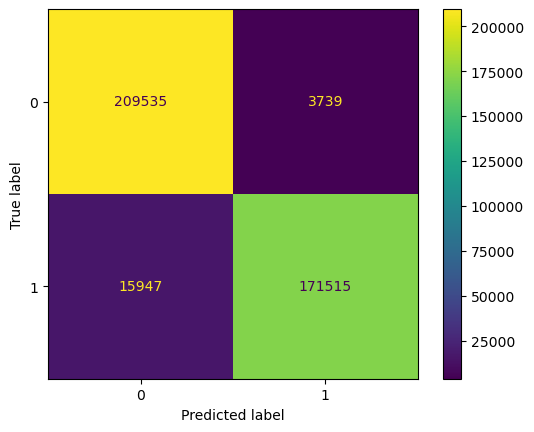

In [23]:
cm = confusion_matrix(Ytrain, Ytrainpred_logress , labels = df["Class"].unique())
disp = ConfusionMatrixDisplay(cm,display_labels = df["Class"].unique())
disp.plot()

### Decision Tree Classifier

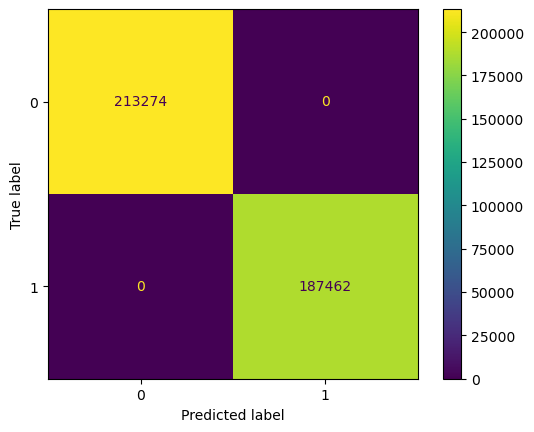

In [24]:
cm = confusion_matrix(Ytrain, Ytrainpred_dectree , labels = df["Class"].unique())
disp = ConfusionMatrixDisplay(cm,display_labels = df["Class"].unique())
disp.plot()

### Random Tree Classifier

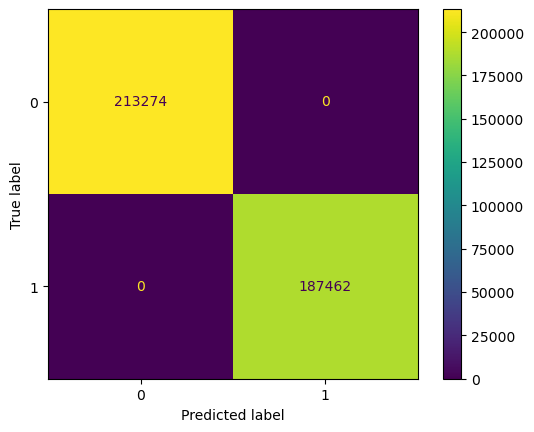

In [25]:
cm = confusion_matrix(Ytrain, Ytrainpred_randfor , labels = df["Class"].unique())
disp = ConfusionMatrixDisplay(cm,display_labels = df["Class"].unique())
disp.plot()

### Support Vector Classifier

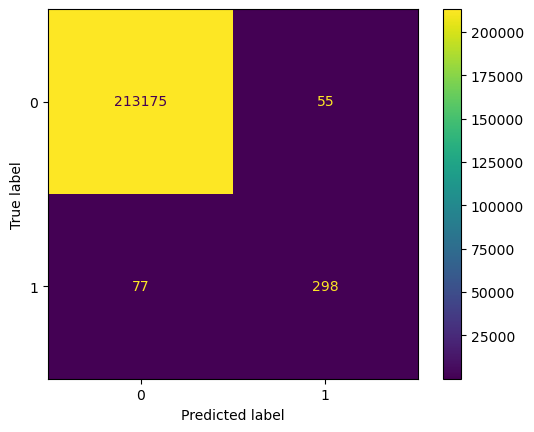

In [26]:
cm = confusion_matrix(Ytrain1, Ytrainpred_svc , labels = df["Class"].unique())
disp = ConfusionMatrixDisplay(cm,display_labels = df["Class"].unique())
disp.plot()

## Confusion Matrix Testing set

### Logistic Regression

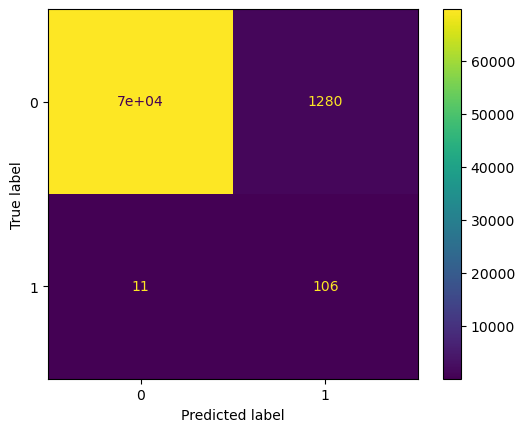

In [27]:
cm = confusion_matrix(Ytest1, Ytestpred_logress , labels = df["Class"].unique())
disp = ConfusionMatrixDisplay(cm,display_labels = df["Class"].unique())
disp.plot()

### Decision Tree Classifier

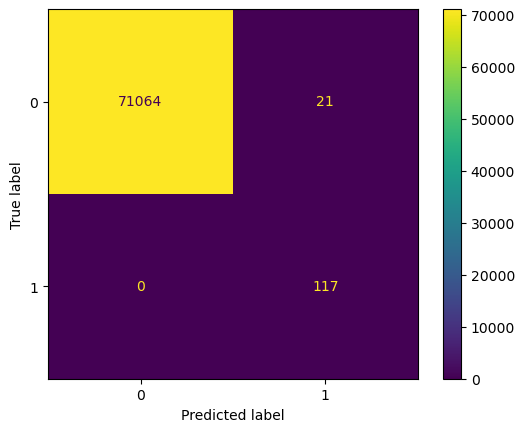

In [28]:
cm = confusion_matrix(Ytest1, Ytestpred_dectree , labels = df["Class"].unique())
disp = ConfusionMatrixDisplay(cm,display_labels = df["Class"].unique())
disp.plot()

### Random Tree Classifier

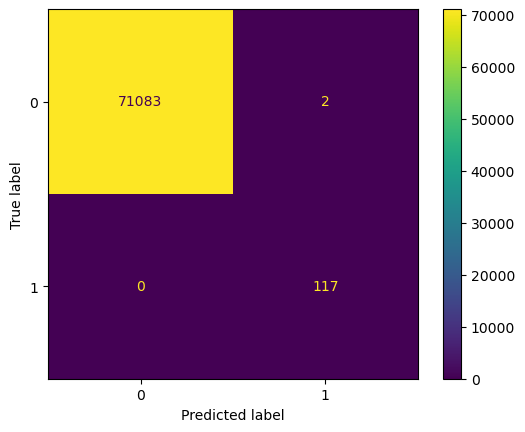

In [29]:
cm = confusion_matrix(Ytest1, Ytestpred_randfor , labels = df["Class"].unique())
disp = ConfusionMatrixDisplay(cm,display_labels = df["Class"].unique())
disp.plot()

### Support Vector Classifier

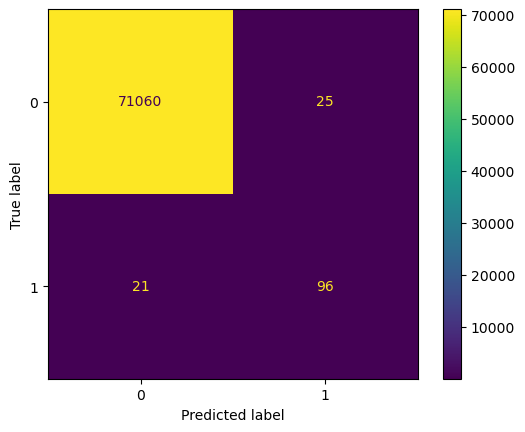

In [30]:
cm = confusion_matrix(Ytest1, Ytestpred_svc , labels = df["Class"].unique())
disp = ConfusionMatrixDisplay(cm,display_labels = df["Class"].unique())
disp.plot()